# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원

- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)

- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 텐서플로우 아키텍쳐

<img src="https://developers.google.com/machine-learning/crash-course/images/TFHierarchy.svg">

<sub>출처: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit</sub>

## 텐서플로우 시작하기

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Init Plugin
Init Graph Optimizer
Init Kernel


### 텐서(Tensor)의 객체
- 타입(Type): `string`, `float32`, `float16`, `int32`, `int8` 등

- 형상(Shape): 0, 1, 2차원 등의 데이터 차원 

- 축(Rank): 차원의 개수

### 텐서의 차원과 연산

In [2]:
i8 = tf.constant(2)
print(tf.rank(i8))

tf.Tensor(0, shape=(), dtype=int32)
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-06-07 20:34:12.961173: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-07 20:34:12.961313: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
t1 = tf.constant([[2., 3., 4.],
                  [5., 6., 7.]])
t2 = tf.constant([[1., 2.],
                  [3., 4.],
                  [5., 6.]])

print(t1 @ t2)

tf.Tensor(
[[31. 40.]
 [58. 76.]], shape=(2, 2), dtype=float32)


### 난수 생성

### 즉시 실행 모드 (Eager Mode) 지원
- 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음

- 1.x 버전에서는 '그래프'를 생성하고, 초기화 한 뒤에 세션을 통해 **값을 흐르게 하는 작업**을 진행해야함


### 텐서 플로우 ↔ 넘파이
- `numpy()`
- `tf.convet_to_tensor()`

### 넘파이처럼 사용하기


### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

- 타입변환에는 `tf.cast()` 사용

### AutoGraph (오토그래프)

- Tensorflow가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로 Graph로 만들어 연산을 진행

- `tf.Graph`

- 유연성이 있음

  - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow 사용 가능 

In [2]:
import timeit

### @tf.function
- 자동으로 그래프를 생성(Auto Graph)

- 그래프로 변환하여 사용 -> GPU 연산 가능

- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능


- 원본 함수가 필요하다면 `(tf.function).python_function()`

In [3]:
@tf.function
def my_function(x):
    return x**2 - 10*x + 3

print(my_function(2))
print(my_function(tf.constant(2)))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


2023-06-08 20:08:03.599659: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-08 20:08:03.599775: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-06-08 20:08:03.607520: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-06-08 20:08:03.609689: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-08 20:08:03.619554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [4]:
def my_function_(x):
    return x**2 - 10*x + 3

print(my_function_(2))
print(my_function_(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


In [5]:
tf_my_func = tf.function(my_function_)
print(tf_my_func)
print(tf_my_func(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [6]:
tf_my_func.python_function(2)

-13

In [7]:
def function_to_get_faster(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

a_function_that_uses_a_graph = tf.function(function_to_get_faster)

x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0],
                  [3.0]])
b1 = tf.constant(4.0)

a_function_that_uses_a_graph(x1, y1, b1).numpy()

2023-06-08 20:08:04.906898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[12.]], dtype=float32)

In [8]:
def inner_function(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

@tf.function
def outer_function(x):
    y = tf.constant([[2.0], [3.0]])
    b = tf.constant(4.0)
    return inner_function(x, y, b)

outer_function(tf.constant([[1.0, 2.0]])).numpy()

2023-06-08 20:08:05.097954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[12.]], dtype=float32)

텐서플로우가 `tf.function`으로 변환한 코드

In [9]:
print(tf.autograph.to_code(my_function.python_function))
print(tf.autograph.to_code(tf_my_func.python_function))
print(tf.autograph.to_code(outer_function.python_function))

def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def tf__my_function_(x):
    with ag__.FunctionScope('my_function_', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def 


 속도 향상


In [13]:
class SequentialModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super(SequentialModel, self).__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
        self.dense1 = tf.keras.layers.Dense(128, activation="relu")
        self.dropout = tf.keras.layers.Dropout(rate=0.2)
        self.dense3 = tf.keras.layers.Dense(10)
    
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dropout(x)
        x = self.dense3(x)
        return x
    
input_data = tf.random.uniform(shape=(60, 28, 28))

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print("Eager time:", timeit.timeit(lambda: eager_model(input_data), number=10000))
print("Graph time:", timeit.timeit(lambda: graph_model(input_data), number=10000))

Eager time: 6.231666708999967


2023-06-08 20:13:42.063275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Graph time: 4.872056458000031


### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [14]:
X = tf.Variable(20.0)
print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


### Autograd (자동 미분)

- `tf.GradientTape` API를 사용
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

In [15]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2

In [16]:
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [18]:
# x2 =  tf.Variable(4.0)

# dy_dx = tape.gradient(y, x2)
# dy_dx.numpy()

In [19]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y_sq = y**2
    z = x**2 + tf.stop_gradient(y_sq)

grad = tape.gradient(z, {"x": x, "y": y})

print("dz_dx:", grad["x"])
print("dz_dy:", grad["y"])

dz_dx: tf.Tensor(4.0, shape=(), dtype=float32)
dz_dy: None


In [24]:
weights = tf.Variable(tf.random.normal(shape=(3, 2)), name="weights")
biases = tf.Variable(tf.zeros(2, dtype=tf.float32), name="biases")
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
    y = x @ weights + biases
    loss = tf.reduce_mean(y**2)

In [25]:
[dL_dw, dL_db] = tape.gradient(loss, [weights, biases])

In [26]:
print(dL_dw)
print(dL_db)

tf.Tensor(
[[ 6.260763   2.3078365]
 [12.521526   4.615673 ]
 [18.78229    6.9235096]], shape=(3, 2), dtype=float32)
tf.Tensor([6.260763  2.3078365], shape=(2,), dtype=float32)


In [29]:
weights2 = tf.Variable(tf.random.normal(shape=(3, 2)), name="weights")
biases2 = tf.Variable(tf.zeros(2, dtype=tf.float32), name="biases")
x2 = [[4., 5., 6.]]

with tf.GradientTape(persistent=True) as tape:
    y = x2 @ weights2 + biases2
    loss = tf.reduce_mean(y**2)

[dL_dw, dL_db] = tape.gradient(loss, [weights2, biases2])

print(weights2)
print(dL_dw)

<tf.Variable 'weights:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.894392  ,  1.2188493 ],
       [-0.63956976, -0.96142286],
       [-1.9974698 , -0.4106613 ]], dtype=float32)>
tf.Tensor(
[[-46.420395  -9.582739]
 [-58.025494 -11.978424]
 [-69.63059  -14.374108]], shape=(3, 2), dtype=float32)


In [30]:
del tape

## 간단한 신경망 구조 

### 뉴런
- 입력 → 연산 → 활성화함수 → 출력

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Neuron(x, W, bias=0):
    z = np.dot(x, W) + bias
    return sigmoid(z)

In [4]:
x = tf.random.normal(shape=(1, 2), mean=0, stddev=1)
W = tf.random.normal(shape=(2, 2), mean=0, stddev=1)

print("x.shape:", x.shape)
print("W.shape:", W.shape, end="\n\n")

print(x)
print(W, end="\n\n")

print(Neuron(x, W))

x.shape: (1, 2)
W.shape: (2, 2)

tf.Tensor([[-1.8059578 -1.9729264]], shape=(1, 2), dtype=float32)
tf.Tensor(
[[ 0.00760138  0.69223094]
 [-0.15100335 -1.5968612 ]], shape=(2, 2), dtype=float32)

[[0.57057333 0.8699311 ]]


### 퍼셉트론 학습 알고리즘 (가중치 업데이트)

## $\qquad w^{(next step)} = w + \eta \ (y - \tilde{y}) \ x$

- $w \ $: 가중치

- $\eta \ $ : 학습률

- $y \ $ : 정답 레이블

- $\tilde{y} \ $: 예측 레이블


In [5]:
x = 1
y = 0
W = tf.random.normal([1], mean=0, stddev=1)
print(Neuron(x, W))
print("y:", y)

[0.53222745]
y: 0


In [6]:
for i in range(1000):
    output = Neuron(x, W)
    error = y - output
    W += 0.1 * error * x

    if i % 100 == 99:
        print("{}\t{}\t{}".format(i+1, error, output))

100	[-0.10436254]	[0.10436254]
200	[-0.05296091]	[0.05296091]
300	[-0.03512104]	[0.03512104]
400	[-0.02618832]	[0.02618832]
500	[-0.02084945]	[0.02084945]
600	[-0.01730631]	[0.01730631]
700	[-0.01478623]	[0.01478623]
800	[-0.01290337]	[0.01290337]
900	[-0.01144378]	[0.01144378]
1000	[-0.01027956]	[0.01027956]


In [7]:
def Neuron2(x, W, bias=0):
    z = tf.matmul(x, W, transpose_b=True) + bias
    return sigmoid(z)   

In [8]:
x = tf.random.normal(shape=(1, 3), mean=0, stddev=1)
y = tf.ones(1)
W = tf.random.normal(shape=(1, 3), mean=0, stddev=1)

print(Neuron2(x, W))
print("y:", y)

[[0.30443236]]
y: tf.Tensor([1.], shape=(1,), dtype=float32)


In [9]:
for i in range(1000):
    output = Neuron2(x, W)
    error = y - output
    W += 0.1 * error * x

    if i % 100 == 99:
        print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.05547416]]	[[0.94452584]]
200	[[0.02664423]]	[[0.97335577]]
300	[[0.01744115]]	[[0.98255885]]
400	[[0.01294374]]	[[0.98705626]]
500	[[0.01028353]]	[[0.9897165]]
600	[[0.00852758]]	[[0.9914724]]
700	[[0.00728238]]	[[0.9927176]]
800	[[0.00635362]]	[[0.9936464]]
900	[[0.00563455]]	[[0.99436545]]
1000	[[0.00506139]]	[[0.9949386]]


In [10]:
x = tf.random.normal(shape=(1, 3), mean=0, stddev=1)
weights = tf.random.normal(shape=(1, 3), mean=0, stddev=1)
bias = tf.zeros(shape=(1, 1))

y = tf.ones(shape=(1, ))

print("x\t: {}\nweights\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[ 0.42678377  0.33458892 -0.13393275]]
weights	: [[ 0.2872586  -0.62095994  0.6467695 ]]
bias	: [[0.]]


In [11]:
for i in range(1000):
    output = Neuron2(x, weights, bias=bias)
    error = y - output
    weights += 0.1 * error * x
    bias += 0.1 * error * 1

    if i % 100 == 99:
        print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.08093655]]	[[0.91906345]]
200	[[0.04035151]]	[[0.9596485]]
300	[[0.02666569]]	[[0.9733343]]
400	[[0.0198651]]	[[0.9801349]]
500	[[0.01581216]]	[[0.98418784]]
600	[[0.01312572]]	[[0.9868743]]
700	[[0.0112161]]	[[0.9887839]]
800	[[0.00978959]]	[[0.9902104]]
900	[[0.0086838]]	[[0.9913162]]
1000	[[0.00780171]]	[[0.9921983]]


In [12]:
print("x\t: {}\nweights\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[ 0.42678377  0.33458892 -0.13393275]]
weights	: [[1.9196627  0.6588089  0.13449088]]
bias	: [[3.8248994]]


### AND Gate

In [19]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([[0],
              [0],
              [0],
              [1]])

W = tf.random.normal([2], mean=0, stddev=1)
b = tf.random.normal([1], mean=0, stddev=1)

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(X[j] * W) + b)
        error = Y[j][0] - output
        W += 0.1 * error * X[j]
        b += 0.1 * error * 1
        error_sum += error

    if i % 200 == 0:
        print("Epoch {:4d}\tError {}".format(i, error))

print("\n가중치\t: {}".format(W))
print("편향\t: {}".format(b))

Epoch    0	Error [0.70363724]
Epoch  200	Error [0.24189341]
Epoch  400	Error [0.14930844]
Epoch  600	Error [0.10718703]
Epoch  800	Error [0.08326745]
Epoch 1000	Error [0.06792611]
Epoch 1200	Error [0.05728364]
Epoch 1400	Error [0.049483]
Epoch 1600	Error [0.04352796]
Epoch 1800	Error [0.03883743]

가중치	: [6.9880476 6.9849224]
편향	: [-10.647642]


In [20]:
for i in range(4):
    print("X: {}  Y: {}  Output: {}".format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X: [0 0]  Y: [0]  Output: [2.3756227e-05]
X: [0 1]  Y: [0]  Output: [0.02502053]
X: [1 0]  Y: [0]  Output: [0.02509688]
X: [1 1]  Y: [1]  Output: [0.9652876]


### OR Gate

In [23]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([[0],
              [1],
              [1],
              [1]])

W = tf.random.normal(shape=([2]), mean=0, stddev=1)
b = tf.random.normal(shape=([1]), mean=0, stddev=1)

for i in range(2000):
    error_sum = 0

    for j in range(4):
        output = sigmoid(np.sum(X[j] * W) + b)
        error = Y[j][0] - output
        W += 0.1 * error * X[j]
        b += 0.1 * error * 1
        error_sum += error
    
    if i % 200 == 0:
        print("Epoch: {:4d}\t Error Sum: {}".format(i, error_sum))

print("\n가중치\t: {}".format(W))
print("편향\t: {}".format(b))

Epoch:    0	 Error Sum: [1.3004936]
Epoch:  200	 Error Sum: [-0.04507075]
Epoch:  400	 Error Sum: [-0.02463207]
Epoch:  600	 Error Sum: [-0.01682312]
Epoch:  800	 Error Sum: [-0.01272965]
Epoch: 1000	 Error Sum: [-0.01022037]
Epoch: 1200	 Error Sum: [-0.00852914]
Epoch: 1400	 Error Sum: [-0.00731327]
Epoch: 1600	 Error Sum: [-0.00639786]
Epoch: 1800	 Error Sum: [-0.00568534]

가중치	: [8.2320795 8.234465 ]
편향	: [-3.6486676]


In [25]:
for i in range(4):
    print("X: {}, Y: {}, Output: {}".format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X: [0 0], Y: [0], Output: [0.02536562]
X: [0 1], Y: [1], Output: [0.98990726]
X: [1 0], Y: [1], Output: [0.9898835]
X: [1 1], Y: [1], Output: [0.99999726]


### XOR Gate

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [30]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

Y = np.array([[0],
              [1],
              [1],
              [0]])

In [49]:
model = Sequential([Dense(2, activation="sigmoid", input_shape=(2, )),
                    Dense(1, activation="sigmoid")])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_hist = model.fit(X, Y,
                       epochs=2000,
                       batch_size=1,
                       verbose=0)

2023-06-09 15:35:03.572043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [51]:
model.predict(X)

2023-06-09 15:35:41.378582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.42669797],
       [0.5071342 ],
       [0.5126998 ],
       [0.5424763 ]], dtype=float32)

## XOR Gate의 'LOSS' 시각화


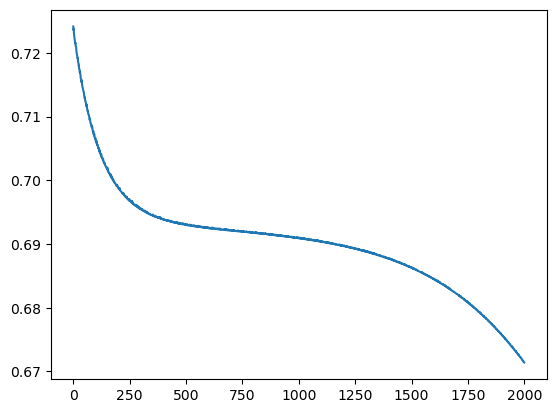

In [53]:
plt.plot(model_hist.history["loss"])